In [ ]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
from google.colab import files
import pandas as pd

uploaded = files.upload()
filename = list(uploaded.keys())[0]
mahoz_data_3 = pd.read_csv(filename)

mahoz_data_3.head()

Saving mahoz_3_final.csv to mahoz_3_final.csv


,source_table,anaf_3,ANAF_2011_ID,nafa,mahoz,ovdim_grp,count_ovdim_grp,count_income,count_income_per_employee,count_income_per_income,...,Q1_income,Q3_income,Q1_Insurence,Q3_Insurence,Q1_labor_wage,Q3_labor_wage,Q1_purcheses,Q3_purcheses,Q1_rent,Q3_rent
0,agg_data_by_anaf_3_and_mahoz_and_ovdim_grp,960,NaN,NaN,1,0,NaN,110,110,110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,agg_data_by_anaf_3_and_mahoz_and_ovdim_grp,960,NaN,NaN,1,1,NaN,78,78,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,agg_data_by_anaf_3_and_mahoz_and_ovdim_grp,960,NaN,NaN,1,2,NaN,35,35,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,agg_data_by_anaf_3_and_mahoz_and_ovdim_grp,960,NaN,NaN,1,3,NaN,14,14,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,agg_data_by_anaf_3_and_mahoz_and_ovdim_grp,960,NaN,NaN,2,0,NaN,114,114,114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import numpy as np

mahoz_data_3 = mahoz_data_3.drop(columns=["source_table"], errors="ignore")

y_vars = [
    "mean_income", "meadian_income","Q1_income","Q3_income",
    "mean_Insurence", "meadian_Insurence","Q1_Insurence","Q3_Insurence",
    "mean_purcheses", "meadian_purcheses","Q1_purcheses","Q3_purcheses",
    "mean_labor_wage", "meadian_labor_wage","Q1_labor_wage","Q3_labor_wage",
    "mean_rent", "meadian_rent","Q1_rent","Q3_rent"
]

# target (log-transformed once)
y = np.log(mahoz_data_3["mean_income"])

# predictors = all columns not in targets + also drop מחוז
X = mahoz_data_3.drop(columns=y_vars + ["מחוז"])
X = X.loc[:, ~X.columns.str.contains("count")]


In [ ]:
float_cols = [
    "גיל נישואין חציוני",
    "סך הכל משקי בית",
    "סך הכל אוכלוסייה",
    "הכנסה חציונית שנתית מעבודה של עצמאים",
    "הכנסה חציונית שנתית מעבודה של שכירים"
]

# Ensure mahoz stays int (but careful: int can't hold NaN in pandas)
# If mahoz has missing values, better to keep it as category or fill first
X["mahoz"] = X["mahoz"].astype("Int64")   # pandas nullable integer type

# Convert the rest to float
X[float_cols] = X[float_cols].astype(float)

### **Train the General Mahoz model on 3 digits data with log median as an outcome**


In [ ]:
from autogluon.tabular import TabularPredictor

# Merge features + target
train_general = X.copy()
train_general["mean_income"] = y   # add target column

# Train AutoGluon general model on all data
predictor_general = TabularPredictor(
    label="mean_income",
    path="autogluon_general/",
    eval_metric="mean_absolute_percentage_error",
).fit(
    train_general,
    presets="medium_quality_faster_train",  # or "best_quality" for max accuracy
    time_limit=600,
    ag_args_fit={"seed": 42}
)

Preset alias specified: 'medium_quality_faster_train' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Sep  6 09:54:41 UTC 2025
CPU Count:          2
Memory Avail:       11.19 GB / 12.67 GB (88.3%)
Disk Space Avail:   180.39 GB / 225.83 GB (79.9%)
Presets specified: ['medium_quality_faster_train']
Using hyperparameters preset: hyperparameters='default'
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/autogluon_general"
Train Data Rows:    1569
Train Data Columns: 393
Label Column:       mean_income
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (15.396233267027222, 12.83393027793568, 14.21819, 0.57586)
	If 

### **Read the Mahoz 4 digits data with sims**

In [ ]:
import pandas as pd
from google.colab import files
import pandas as pd

uploaded = files.upload()
filename = list(uploaded.keys())[0]
mahoz_data_4 = pd.read_csv(filename)

mahoz_data_4.head()

Saving mahoz_4_final.csv to mahoz_4_final.csv


,source_table,anaf_3,ANAF_2011_ID,nafa,mahoz,ovdim_grp,count_ovdim_grp,count_income,count_income_per_employee,count_income_per_income,...,Q1_income,Q3_income,Q1_Insurence,Q3_Insurence,Q1_labor_wage,Q3_labor_wage,Q1_purcheses,Q3_purcheses,Q1_rent,Q3_rent
0,agg_data_by_anaf_4_and_mahoz_and_ovdim_grp,107,1071,NaN,1,0,NaN,12,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,agg_data_by_anaf_4_and_mahoz_and_ovdim_grp,107,1071,NaN,1,1,NaN,17,17,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,agg_data_by_anaf_4_and_mahoz_and_ovdim_grp,107,1071,NaN,1,2,NaN,12,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,agg_data_by_anaf_4_and_mahoz_and_ovdim_grp,107,1071,NaN,1,3,NaN,15,15,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,agg_data_by_anaf_4_and_mahoz_and_ovdim_grp,107,1071,NaN,1,4,NaN,21,21,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mahoz_data_4 = mahoz_data_4.drop(columns=["source_table"], errors="ignore")

y_vars = [
    "mean_income", "meadian_income","Q1_income","Q3_income",
    "mean_Insurence", "meadian_Insurence","Q1_Insurence","Q3_Insurence",
    "mean_purcheses", "meadian_purcheses","Q1_purcheses","Q3_purcheses",
    "mean_labor_wage", "meadian_labor_wage","Q1_labor_wage","Q3_labor_wage",
    "mean_rent", "meadian_rent","Q1_rent","Q3_rent"
]

# target (log-transformed once)
y = np.log(mahoz_data_4["mean_income"])

# predictors = all columns not in targets + also drop מחוז
X = mahoz_data_4.drop(columns=y_vars + ["מחוז"])
X = X.loc[:, ~X.columns.str.contains("count")]

### **autogloun  augmentation evaluation (4 digits)**

In [ ]:
import numpy as np
from autogluon.tabular import TabularPredictor

# ---------------------------
# 1. Load the already trained general model
# ---------------------------
predictor_general = TabularPredictor.load("autogluon_general/")

# ---------------------------
# 2. Generate predictions from the general model
# ---------------------------
X_aug = X.copy()
X_aug["pred_from_general"] = predictor_general.predict(X)

# ---------------------------
# 3. Train specific model with augmented feature
# ---------------------------
train_specific = X_aug.copy()
train_specific["mean_income"] = y   # log target

predictor_specific = TabularPredictor(
    label="mean_income",
    path="autogluon_specific/",
    eval_metric="mean_absolute_percentage_error",
).fit(
    train_specific,
    presets="medium_quality_faster_train",
    time_limit=600,
    ag_args_fit={"seed": 42}
)





Preset alias specified: 'medium_quality_faster_train' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Sep  6 09:54:41 UTC 2025
CPU Count:          2
Memory Avail:       10.76 GB / 12.67 GB (84.9%)
Disk Space Avail:   180.28 GB / 225.83 GB (79.8%)
Presets specified: ['medium_quality_faster_train']
Using hyperparameters preset: hyperparameters='default'
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/autogluon_specific"
Train Data Rows:    1230
Train Data Columns: 394
Label Column:       mean_income
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (15.346121257045558, 12.83434074696926, 14.10242, 0.57584)
	If

### **Stage 2: From Mahoz to nafa**

In [ ]:
import pandas as pd
from google.colab import files
import pandas as pd

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df_nafa_3 = pd.read_csv(filename)

df_nafa_3.head()

Saving nafa_3_final.csv to nafa_3_final.csv


,source_table,anaf_3,ANAF_2011_ID,nafa,mahoz,ovdim_grp,count_ovdim_grp,count_income,count_income_per_employee,count_income_per_income,...,Q1_income,Q3_income,Q1_Insurence,Q3_Insurence,Q1_labor_wage,Q3_labor_wage,Q1_purcheses,Q3_purcheses,Q1_rent,Q3_rent
0,agg_data_by_anaf_3_and_nafa_and_ovdim_grp,960,NaN,1,4.0,0,NaN,116,116,116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,agg_data_by_anaf_3_and_nafa_and_ovdim_grp,960,NaN,1,4.0,1,NaN,75,75,75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,agg_data_by_anaf_3_and_nafa_and_ovdim_grp,960,NaN,1,4.0,2,NaN,30,30,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,agg_data_by_anaf_3_and_nafa_and_ovdim_grp,960,NaN,2,4.0,0,NaN,167,167,167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,agg_data_by_anaf_3_and_nafa_and_ovdim_grp,960,NaN,2,4.0,1,NaN,98,98,98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_nafa_3 = df_nafa_3.drop(columns=["source_table"], errors="ignore")

y_vars = [
    "mean_income", "meadian_income","Q1_income","Q3_income",
    "mean_Insurence", "meadian_Insurence","Q1_Insurence","Q3_Insurence",
    "mean_purcheses", "meadian_purcheses","Q1_purcheses","Q3_purcheses",
    "mean_labor_wage", "meadian_labor_wage","Q1_labor_wage","Q3_labor_wage",
    "mean_rent", "meadian_rent","Q1_rent","Q3_rent"
]

# target (log-transformed once)
y = np.log(df_nafa_3["mean_income"])

# predictors = all columns not in targets
X = df_nafa_3.drop(columns=y_vars + ["נפה"])
X = X.loc[:, ~X.columns.str.contains("count")]


In [ ]:
from autogluon.tabular import TabularPredictor

# Load trained model
predictor_general = TabularPredictor.load("autogluon_general/")
general_preds = predictor_general.predict(X)

X_aug = X.copy()
X_aug["pred_from_general"] = general_preds

In [ ]:
# Step 3: Merge with target for training
train_nafa_specific = X_aug.copy()
train_nafa_specific["mean_income"] = y

# Step 4: Train the specific model
predictor_nafa_specific = TabularPredictor(
    label="mean_income",
    path="autogluon_nafa_specific/"
    ,eval_metric="mean_absolute_percentage_error",

).fit(
    train_nafa_specific,
    presets="medium_quality_faster_train",  # "best_quality" if you want max accuracy
    time_limit=600,
    ag_args_fit={"seed": 42}
)

Preset alias specified: 'medium_quality_faster_train' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Sep  6 09:54:41 UTC 2025
CPU Count:          2
Memory Avail:       10.62 GB / 12.67 GB (83.8%)
Disk Space Avail:   180.22 GB / 225.83 GB (79.8%)
Presets specified: ['medium_quality_faster_train']
Using hyperparameters preset: hyperparameters='default'
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/autogluon_nafa_specific"
Train Data Rows:    2287
Train Data Columns: 398
Label Column:       mean_income
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (15.376251731934625, 12.819493734934117, 14.16431, 0.5719

### **Read the most specific nafa 4 train set and split it**

In [ ]:
import pandas as pd
from google.colab import files
import pandas as pd

uploaded = files.upload()
filename = list(uploaded.keys())[0]
nafa_4 = pd.read_csv(filename)

nafa_4 = nafa_4[nafa_4["mean_income"] > 0].copy()

Saving nafa_4_final.csv to nafa_4_final (2).csv


In [ ]:
import pandas as pd
from google.colab import files
import pandas as pd

uploaded = files.upload()
filename = list(uploaded.keys())[0]
shva = pd.read_csv(filename)
shva = shva[shva["mean_income"] > 0].copy()
shva["mean_income"] = shva["mean_income"] * 12

Saving shva.csv to shva (1).csv


In [ ]:
# Compute cutoffs
lower = shva["mean_income"].quantile(0.05)
upper = shva["mean_income"].quantile(0.90)

# Keep only rows within [5%, 95%]
shva = shva[(shva["mean_income"] >= lower) & (shva["mean_income"] <= upper)].copy()

# Filter for ovdim_grp values 0 or 1
nafa_4 = nafa_4[nafa_4["ovdim_grp"].isin([0, 1,2,3,4])].copy()
shva   = shva[shva["ovdim_grp"].isin([0, 1,2,3,4])].copy()

# Quick check
print("nafa_4 shape after filter:", nafa_4.shape)
print("shva shape after filter:", shva.shape)
print("Unique values in nafa_4 ovdim_grp:", nafa_4["ovdim_grp"].unique())
print("Unique values in shva ovdim_grp:", shva["ovdim_grp"].unique())


nafa_4 shape after filter: (1537, 434)
shva shape after filter: (741, 394)
Unique values in nafa_4 ovdim_grp: [0 2 3 4 1]
Unique values in shva ovdim_grp: [0. 2. 3. 4. 1.]


In [ ]:
import numpy as np

# Replace "לא נמצא" with NaN and cast to float
shva["אחוז יהודים ואחרים ילידי חו_ל"] = (
    shva["אחוז יהודים ואחרים ילידי חו_ל"]
    .replace("לא נמצא", np.nan)
    .astype(float)
)

# List of missing anaf_3 variables
missing_cols = ['anaf_3_873', 'anaf_3_943', 'anaf_3_872', 'anaf_3_882']

# Loop to create binary columns
for col in missing_cols:
    code = col.split("_")[-1]           # extract code, e.g. "873"
    shva[col] = (shva["anaf_3"] == int(code)).astype(int)


nafa_4.columns = nafa_4.columns.str.replace(".", " ", regex=False)
nafa_4 = nafa_4.rename(columns={
    "אחוז בני 15 ומעלה שעבדו ב 12 החודשים": "אחוז בני 15 ומעלה שעבדו ב-12 החודשים"
})
nafa_4 = nafa_4.drop(columns=["source_table"], errors="ignore")
y_vars = [
    "mean_income", "meadian_income","Q1_income","Q3_income",
    "mean_Insurence", "meadian_Insurence","Q1_Insurence","Q3_Insurence",
    "mean_purcheses", "meadian_purcheses","Q1_purcheses","Q3_purcheses",
    "mean_labor_wage", "meadian_labor_wage","Q1_labor_wage","Q3_labor_wage",
    "mean_rent", "meadian_rent","Q1_rent","Q3_rent"
]
y = np.log(nafa_4["mean_income"])

# predictors = all columns not in target + also drop נפה
X = nafa_4.drop(columns=y_vars + ["נפה"])

X = X.loc[:, ~X.columns.str.contains("count")]

# 1. Target = log of meadian_income
Y_shva = np.log(shva["mean_income"])

# 2. Predictors = all columns except meadian_income
X_shva = shva.drop(columns=["mean_income"])




### **The cell below trains an autogluon model on the whole data, no splitting and no evaluation, if you want to split and train, skip the next 3 cells**

In [ ]:
import pandas as pd
import numpy as np
from autogluon.tabular import TabularPredictor

import pandas as pd
import numpy as np
from autogluon.tabular import TabularPredictor

from autogluon.tabular import TabularPredictor

# Load the already-trained models
predictor_general = TabularPredictor.load("autogluon_general")
predictor_specific = TabularPredictor.load("autogluon_specific")
predictor_specific_nafa = TabularPredictor.load("autogluon_nafa_specific")


# ===================================
# 1. Merge the datasets (full data)
# ===================================
X_full = pd.concat([X, X_shva], axis=0, ignore_index=True)
Y_full = pd.concat([y, Y_shva], axis=0, ignore_index=True)

# ===================================
# 2. Augment with existing model preds
# ===================================
X_full_aug = X_full.copy()

# General model predictions
X_full_aug["pred_from_general"] = predictor_general.predict(X_full)

# Specific model predictions
X_full_aug["specific_pred"] = predictor_specific.predict(X_full_aug)

# Nafa-specific model predictions
X_full_aug["specific_nafa_pred"] = predictor_specific_nafa.predict(X_full_aug)

# ===================================
# 3. Train final model (no split)
# ===================================
train_final = X_full_aug.copy()
train_final["mean_income"] = Y_full   # log-transformed target

final_predictor = TabularPredictor(
    label="mean_income",
    path="autogluon_final/",

    eval_metric="mean_absolute_percentage_error",
).fit(
    train_final,
    presets="medium_quality_faster_train",
    time_limit=1200,   # increase for final run
    ag_args_fit={"seed": 42}
)

print("✅ Final model trained on full augmented dataset.")


Preset alias specified: 'medium_quality_faster_train' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Sep  6 09:54:41 UTC 2025
CPU Count:          2
Memory Avail:       10.53 GB / 12.67 GB (83.1%)
Disk Space Avail:   180.11 GB / 225.83 GB (79.8%)
Presets specified: ['medium_quality_faster_train']
Using hyperparameters preset: hyperparameters='default'
Beginning AutoGluon training ... Time limit = 1200s
AutoGluon will save models to "/content/autogluon_final"
Train Data Rows:    2278
Train Data Columns: 400
Label Column:       mean_income
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (15.810911817305616, 12.819493734934117, 14.21153, 0.66153)
	If 

✅ Final model trained on full augmented dataset.


In [ ]:
X_full

,anaf_3,ANAF_2011_ID,nafa,mahoz,ovdim_grp,אחוז זרים,גודל משק בית ממוצע,אחוז משקי בית שעומדים לרשותם שני כלי רכב לפחות,אחוז עובדים מחוץ ליישוב המגורים,גיל נישואין חציוני,...,mahoz_3,mahoz_4,mahoz_5,mahoz_6,mahoz_7,ovdim_grp_0,ovdim_grp_1,ovdim_grp_2,ovdim_grp_3,ovdim_grp_4
0,107,1071,1,4.0,0.0,1.9,2.9,39.6,60.5,25.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,107,1071,1,4.0,2.0,1.9,2.9,39.6,60.5,25.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,107,1071,2,4.0,0.0,2.2,3.0,40.4,59.0,25.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,107,1071,2,4.0,3.0,2.2,3.0,40.4,59.0,25.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,107,1071,2,4.0,4.0,2.2,3.0,40.4,59.0,25.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2273,561,5610,4,5.0,2.0,3.6,2.5,23.7,51.3,25.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2274,960,9602,4,5.0,2.0,3.6,2.5,23.7,51.3,25.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2275,960,9602,4,5.0,4.0,3.6,2.5,23.7,51.3,25.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2276,472,4724,4,5.0,0.0,3.6,2.5,23.7,51.3,25.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### **Save the Final Models**

In [ ]:
"""import shutil
import os

# 1. Define model folders
models = [
    "autogluon_general",
    "autogluon_specific",
    "autogluon_nafa_specific",
    "autogluon_final"
]

# 2. Add suffix "_mean" and copy to temp folder
save_dir = "/content/DSSG_Models"
os.makedirs(save_dir, exist_ok=True)

for model in models:
    new_name = model + "_mean"
    dst_path = os.path.join(save_dir, new_name)
    shutil.copytree(model, dst_path, dirs_exist_ok=True)
    print(f"✅ Copied {model} -> {dst_path}")

# 3. Zip everything
shutil.make_archive("/content/DSSG_Models", 'zip', save_dir)
print("📦 Zipped all models to /content/DSSG_Models.zip")
"""

'import shutil\nimport os\n\n# 1. Define model folders\nmodels = [\n    "autogluon_general",\n    "autogluon_specific",\n    "autogluon_nafa_specific",\n    "autogluon_final"\n]\n\n# 2. Add suffix "_mean" and copy to temp folder\nsave_dir = "/content/DSSG_Models"\nos.makedirs(save_dir, exist_ok=True)\n\nfor model in models:\n    new_name = model + "_mean"\n    dst_path = os.path.join(save_dir, new_name)\n    shutil.copytree(model, dst_path, dirs_exist_ok=True)\n    print(f"✅ Copied {model} -> {dst_path}")\n\n# 3. Zip everything\nshutil.make_archive("/content/DSSG_Models", \'zip\', save_dir)\nprint("📦 Zipped all models to /content/DSSG_Models.zip")\n'

In [ ]:
"""from google.colab import files
files.download("/content/DSSG_Models.zip")"""

'from google.colab import files\nfiles.download("/content/DSSG_Models.zip")'

### **If you want to split to train test and evaluate, proceed from here**

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Build group identifier from ANAF_2011_ID and nafa
groups = X_shva["ANAF_2011_ID"].astype(str) + "_" + X_shva["nafa"].astype(str)

# 2. Temporary dataframe with groups + target
df_tmp = X_shva.copy()
df_tmp["group"] = groups
df_tmp["y"] = Y_shva

# 3. Allocate indices
train_idx, test_idx = [], []

for g, g_df in df_tmp.groupby("group"):
    if len(g_df) == 1:
        # singletons -> all in train
        train_idx.extend(g_df.index)
    else:
        g_train, g_test = train_test_split(
            g_df.index, test_size=0.3, random_state=42   # 70/30 split
        )
        train_idx.extend(g_train)
        test_idx.extend(g_test)

# 4. Build train/test sets
X_shva_train, X_shva_test = X_shva.loc[train_idx], X_shva.loc[test_idx]
Y_shva_train, Y_shva_test = Y_shva.loc[train_idx], Y_shva.loc[test_idx]

print("Train:", X_shva_train.shape, "Test:", X_shva_test.shape)

Train: (487, 397) Test: (254, 397)


In [ ]:
from autogluon.tabular import TabularPredictor
# Merge nafa_4 (all rows) with shva_train (only train part)
X_merged = pd.concat([X, X_shva_train], axis=0, ignore_index=True)
Y_merged = pd.concat([y, Y_shva_train], axis=0, ignore_index=True)

# Final training sets
X_train = X_merged
Y_train = Y_merged

# Final test sets
X_test = X_shva_test
Y_test = Y_shva_test

# Predict on train and test splits using the general model
train_general_pred = predictor_general.predict(X_train)
test_general_pred  = predictor_general.predict(X_test)

# Add predictions as a new feature
X_train_aug = X_train.copy()
X_train_aug["pred_from_general"] = train_general_pred

X_test_aug = X_test.copy()
X_test_aug["pred_from_general"] = test_general_pred
# Load the trained model (if not already loaded)
predictor_specific = TabularPredictor.load("autogluon_specific/")
#

# Generate predictions on the full nafa_4 feature matrix
specific_preds_train = predictor_specific.predict(X_train_aug)
specific_preds_test =predictor_specific.predict(X_test_aug)

X_train_aug_final = X_train_aug.copy()
X_train_aug_final["specific_pred"] = specific_preds_train

specific_preds_test =predictor_specific.predict(X_test_aug)

X_test_aug_final = X_test_aug.copy()
X_test_aug_final["specific_pred"] = specific_preds_test

# Load the trained model (if not already loaded)
predictor_specific_nafa = TabularPredictor.load("autogluon_nafa_specific/")

# Generate predictions on the full nafa_4 feature matrix
specific_preds_nafa_train = predictor_specific_nafa.predict(X_train_aug)
specific_preds_nafa_test =predictor_specific_nafa.predict(X_test_aug)


X_train_aug_final["specific_nafa_pred"] = specific_preds_nafa_train

X_test_aug_final["specific_nafa_pred"] = specific_preds_nafa_test

In [ ]:
from autogluon.tabular import TabularPredictor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Merge features + target
train_data = X_train_aug_final.copy()
train_data["mean_income"] = Y_train   # already log-transformed

test_data = X_test_aug_final.copy()
test_data["mean_income"] = Y_test     # already log-transformed

# Train predictor
predictor = TabularPredictor(
    label="mean_income",
    path="autogluon_specific_split/",
    eval_metric="mean_absolute_percentage_error",  # won't matter, we'll compute custom metrics
).fit(
    train_data,
    presets="medium_quality_faster_train",
    time_limit=600,
    ag_args_fit={"seed": 42}
)

# AutoGluon metrics (on log target)
performance = predictor.evaluate(test_data)
print("AutoGluon metrics (log target):", performance)

# ---------------------------
# Custom evaluation
# ---------------------------
y_pred_log = predictor.predict(X_test_aug_final)   # predictions in log space
y_true_log = Y_test                                # true values in log space

# 1. RMSE in log space
rmse_log = np.sqrt(mean_squared_error(y_true_log, y_pred_log))

# 2. MAPE in original scale
y_pred_original = np.exp(y_pred_log)
y_true_original = np.exp(y_true_log)
mape_original = mean_absolute_percentage_error(y_true_original, y_pred_original)

print("Custom metrics:")
print(f"  RMSE (log space): {rmse_log:.4f}")
print(f"  MAPE (original scale): {mape_original:.4%}")


Preset alias specified: 'medium_quality_faster_train' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.78 GB / 12.67 GB (85.1%)
Disk Space Avail:   180.31 GB / 225.83 GB (79.8%)
Presets specified: ['medium_quality_faster_train']
Using hyperparameters preset: hyperparameters='default'
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/autogluon_specific_split"
Train Data Rows:    2024
Train Data Columns: 400
Label Column:       mean_income
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (15.778127471443543, 12.819493734934117, 14.16997, 0.636

AutoGluon metrics (log target): {'mean_absolute_percentage_error': -0.007355389413960007, 'root_mean_squared_error': np.float64(-0.16525217588643157), 'mean_squared_error': -0.02730828163520012, 'mean_absolute_error': -0.10680385624909576, 'r2': 0.9526099769537485, 'pearsonr': 0.9764632304806296, 'median_absolute_error': np.float64(-0.06266633633033347)}
Custom metrics:
  RMSE (log space): 0.1653
  MAPE (original scale): 10.8608%


In [ ]:
import pandas as pd
import numpy as np

# Convert back to original scale
y_pred_original = np.exp(y_pred_log)
y_true_original = np.exp(y_true_log)

# Build a DataFrame with identifiers
results_df = X_test_aug_final.copy()
results_df["y_true"] = y_true_original
results_df["y_pred"] = y_pred_original
results_df["abs_pct_error"] = np.abs(results_df["y_true"] - results_df["y_pred"]) / results_df["y_true"]

# Sort by error
results_sorted = results_df.sort_values("abs_pct_error")

# Get lowest 5 (best predictions)
best5 = results_sorted.head(5)[["nafa", "ANAF_2011_ID", "y_true", "y_pred", "abs_pct_error"]].reset_index(drop=True)

# Get highest 5 (worst predictions)
worst5 = results_sorted.tail(5)[["nafa", "ANAF_2011_ID", "y_true", "y_pred", "abs_pct_error"]].reset_index(drop=True)

# Get 5 around the median error
median_idx = len(results_sorted) // 2
middle5 = results_sorted.iloc[median_idx-2:median_idx+3][["nafa", "ANAF_2011_ID", "y_true", "y_pred", "abs_pct_error"]].reset_index(drop=True)

print("=== Best 5 predictions (lowest error) ===")
print(best5)

print("\n=== Worst 5 predictions (highest error) ===")
print(worst5)

print("\n=== Middle 5 predictions (around median error) ===")
print(middle5)

# Compute absolute percentage errors
ape = np.abs(y_true_original - y_pred_original) / y_true_original

# Median Absolute Percentage Error
mdape = np.median(ape)

print(f"Median Absolute Percentage Error (MdAPE): {mdape:.4%}")


=== Best 5 predictions (lowest error) ===
   nafa  ANAF_2011_ID      y_true       y_pred  abs_pct_error
0    12          4770  2022955.80  2022959.250       0.000002
1     5          5610  3906278.16  3908059.750       0.000456
2     5          4727  2678773.92  2675782.000       0.001117
3     6          4770  2014446.24  2016812.375       0.001175
4     6          4770  2014446.24  2016812.375       0.001175

=== Worst 5 predictions (highest error) ===
   nafa  ANAF_2011_ID     y_true       y_pred  abs_pct_error
0    10          5611  941551.08  1550169.375       0.646400
1     2          4770  809807.04  1460080.375       0.802998
2     1          5611  901487.04  1843941.375       1.045444
3     4          5611  831176.16  1746411.375       1.101133
4     8          5611  793312.56  1670252.750       1.105416

=== Middle 5 predictions (around median error) ===
   nafa  ANAF_2011_ID      y_true        y_pred  abs_pct_error
0     2          4770  5905906.08  6.274583e+06       0.0624

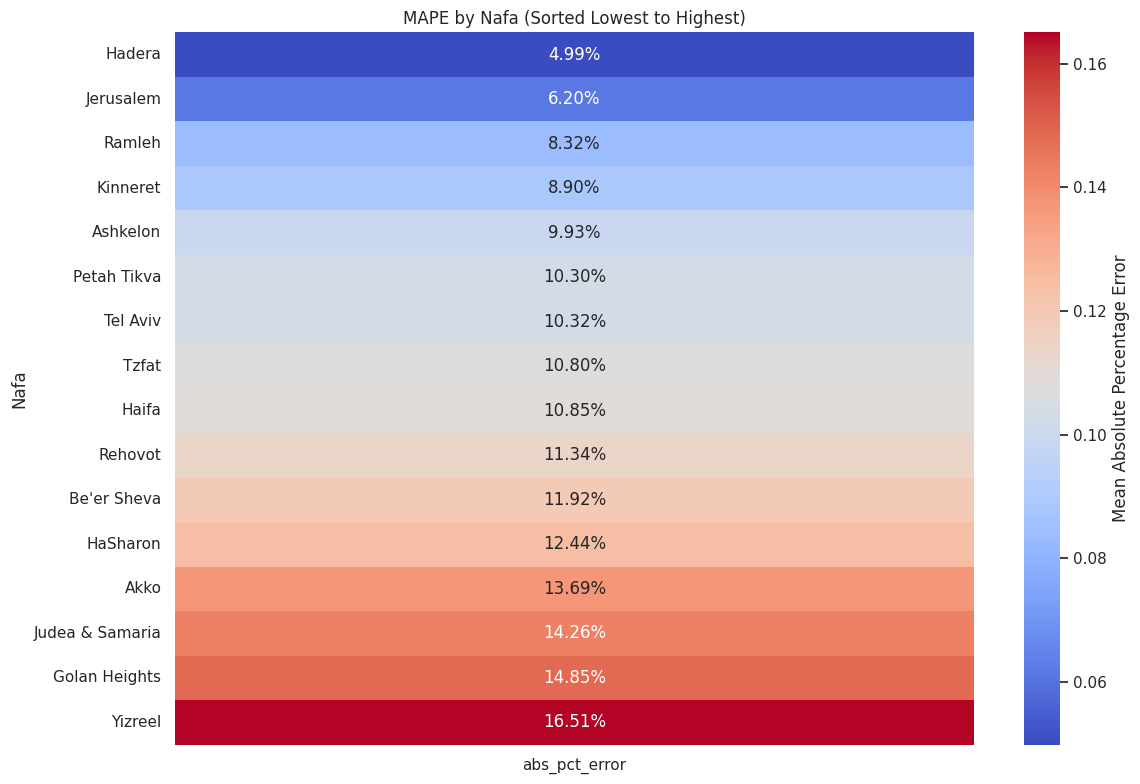

In [ ]:
# --- Mapping dictionary ---
nafa_mapping = {
    1: "Rehovot",
    2: "Petah Tikva",
    3: "Ashkelon",
    4: "Tel Aviv",
    5: "Jerusalem",
    6: "Hadera",
    7: "Akko",
    8: "Yizreel",
    9: "HaSharon",
    10: "Be'er Sheva",
    11: "Ramleh",
    12: "Haifa",
    13: "Tzfat",
    14: "Kinneret",
    15: "Judea & Samaria",
    16: "Golan Heights",
    17: "Others"
}

# --- Replace numeric codes with names ---
results_df["nafa_name"] = results_df["nafa"].map(nafa_mapping)

# --- Recompute MAPE per nafa_name ---
mape_by_nafa = results_df.groupby("nafa_name")["abs_pct_error"].mean()

# --- Sort ascending ---
mape_df = mape_by_nafa.reset_index().sort_values("abs_pct_error")

# --- Heatmap ---
plt.figure(figsize=(12, 8))
heatmap_data = mape_df.set_index("nafa_name")

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2%",
    cmap="coolwarm",
    cbar_kws={'label': 'Mean Absolute Percentage Error'}
)

plt.title("MAPE by Nafa (Sorted Lowest to Highest)")
plt.ylabel("Nafa")
plt.xlabel("")
plt.tight_layout()
plt.show()




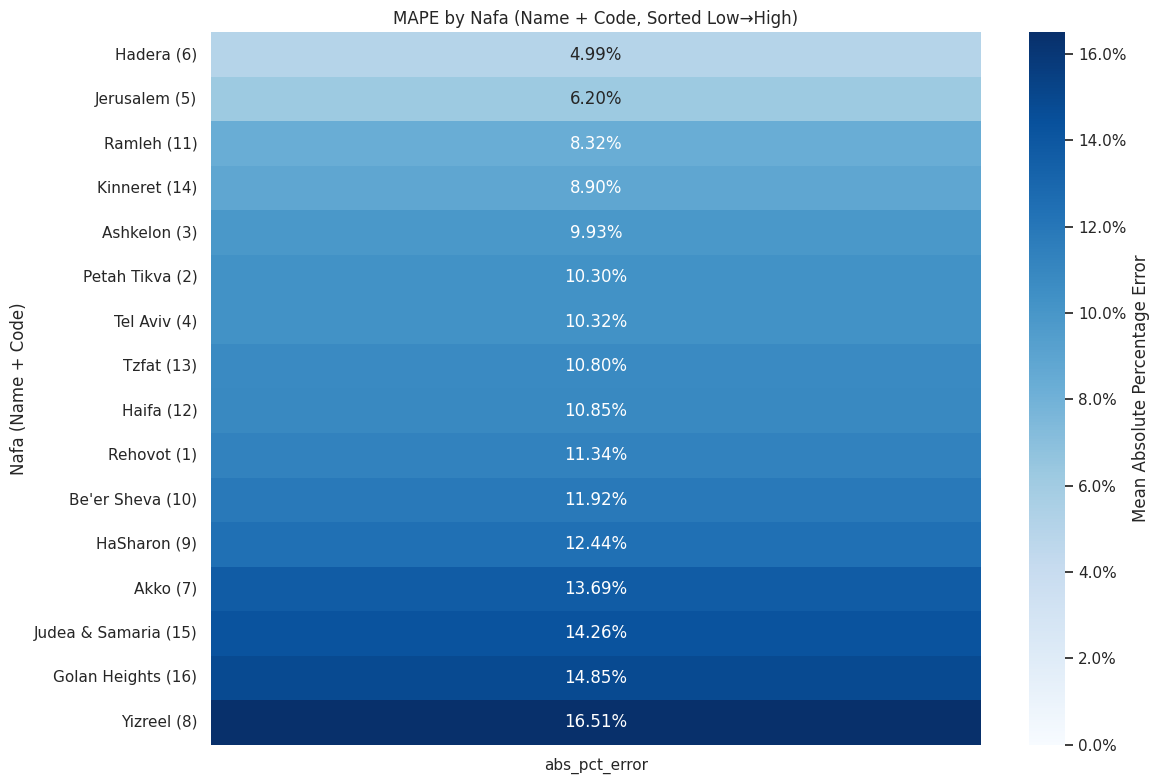

In [ ]:
import matplotlib.ticker as mtick

# --- Build "Name (Code)" labels ---
nafa_label_map = {code: f"{name} ({code})" for code, name in nafa_mapping.items()}

# --- Recompute MAPE, keep sorting as before ---
mape_df = (
    results_df
    .assign(nafa_label=results_df["nafa"].map(lambda c: nafa_label_map.get(c, f"Unknown ({c})")))
    .groupby(["nafa", "nafa_label"])["abs_pct_error"].mean()
    .reset_index()
    .sort_values("abs_pct_error")
)

# --- Heatmap (blue-only palette) ---
plt.figure(figsize=(12, 8))
heatmap_data = mape_df.set_index("nafa_label")[["abs_pct_error"]]

ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2%",
    cmap="Blues",         # use "Blues_r" if you want lower MAPE = darker blue
    vmin=0,               # anchors the lightest tone at 0%
    cbar_kws={'label': 'Mean Absolute Percentage Error'}
)

# Percent-format the colorbar ticks
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.title("MAPE by Nafa (Name + Code, Sorted Low→High)")
plt.ylabel("Nafa (Name + Code)")
plt.xlabel("")
plt.tight_layout()
plt.show()



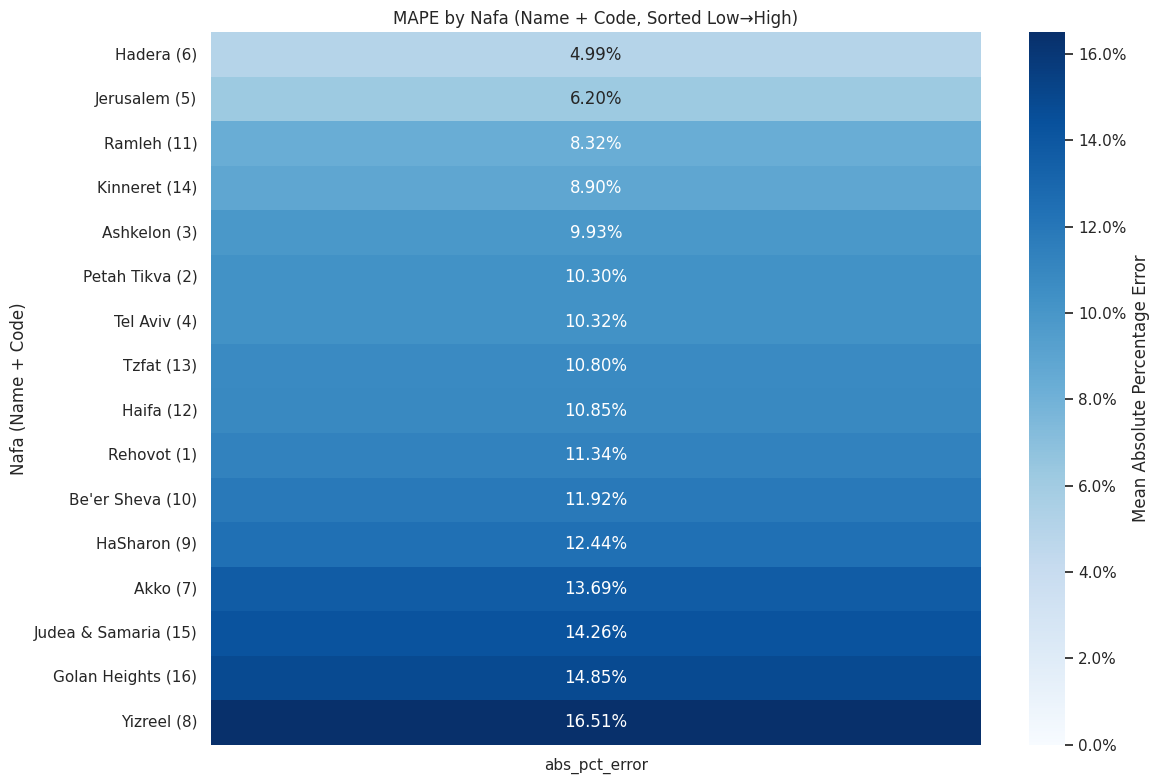

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
"""import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import os
from google.colab import files

# --- Build "Name (Code)" labels ---
nafa_label_map = {code: f"{name} ({code})" for code, name in nafa_mapping.items()}

# --- Recompute MAPE, keep sorting as before ---
mape_df = (
    results_df
    .assign(nafa_label=results_df["nafa"].map(lambda c: nafa_label_map.get(c, f"Unknown ({c})")))
    .groupby(["nafa", "nafa_label"])["abs_pct_error"].mean()
    .reset_index()
    .sort_values("abs_pct_error")
)

# --- Heatmap (blue-only palette) ---
plt.figure(figsize=(12, 8))
heatmap_data = mape_df.set_index("nafa_label")[["abs_pct_error"]]

ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2%",
    cmap="Blues",
    vmin=0,
    cbar_kws={'label': 'Mean Absolute Percentage Error'}
)

# Format colorbar ticks
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.title("MAPE by Nafa (Name + Code, Sorted Low→High)")
plt.ylabel("Nafa (Name + Code)")
plt.xlabel("")
plt.tight_layout()

# --- Save before showing ---
out_path = "/content/mape_by_nafa_blues.png"
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()

# --- Download locally ---
files.download(out_path)
"""

In [ ]:
# --- Compute MAPE by ANAF_2011_ID ---
mape_by_anaf = (
    results_df
    .groupby("ANAF_2011_ID")["abs_pct_error"]
    .mean()
    .reset_index()
)

# Ensure ID is int (not float)
mape_by_anaf["ANAF_2011_ID"] = mape_by_anaf["ANAF_2011_ID"].astype(int)

# --- Sort ascending (best → worst) ---
mape_sorted = mape_by_anaf.sort_values("abs_pct_error")

# --- Best 5 ---
best_5 = mape_sorted.head(5)

# --- Worst 5 ---
worst_5 = mape_sorted.tail(5)

print("Top 5 Best ANAF_2011_IDs (lowest MAPE):")
print(best_5.to_string(index=False))

print("\nTop 5 Worst ANAF_2011_IDs (highest MAPE):")
print(worst_5.to_string(index=False))



Top 5 Best ANAF_2011_IDs (lowest MAPE):
 ANAF_2011_ID  abs_pct_error
         5610       0.057342
         4770       0.092709
         9602       0.094053
         4727       0.097742
         4724       0.167428

Top 5 Worst ANAF_2011_IDs (highest MAPE):
 ANAF_2011_ID  abs_pct_error
         4770       0.092709
         9602       0.094053
         4727       0.097742
         4724       0.167428
         5611       0.169596


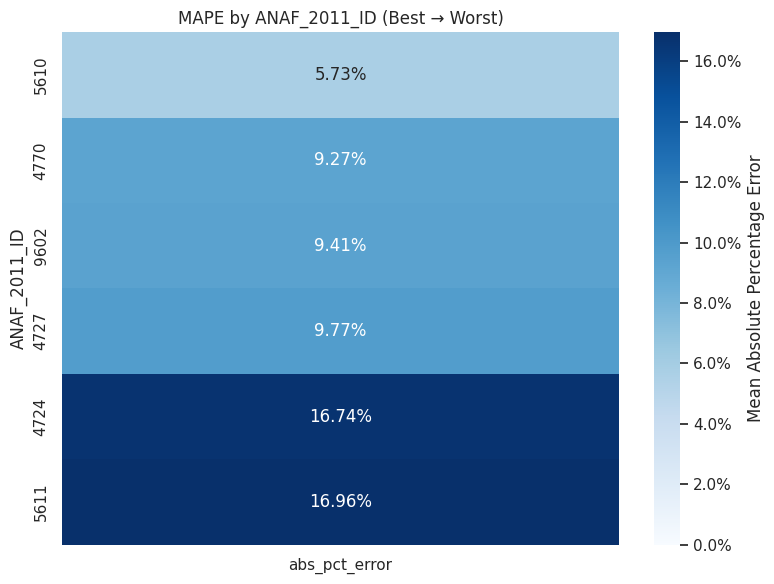

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# --- Compute MAPE by ANAF_2011_ID ---
mape_by_anaf = (
    results_df
    .groupby("ANAF_2011_ID")["abs_pct_error"]
    .mean()
    .reset_index()
)

# Ensure IDs are integers
mape_by_anaf["ANAF_2011_ID"] = mape_by_anaf["ANAF_2011_ID"].astype(int)

# Sort from best (lowest MAPE) to worst (highest MAPE)
mape_sorted = mape_by_anaf.sort_values("abs_pct_error")

# --- Prepare data for heatmap ---
heatmap_data = mape_sorted.set_index("ANAF_2011_ID")[["abs_pct_error"]]

# --- Plot heatmap ---
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2%",
    cmap="Blues",        # Blue-only palette
    vmin=0,
    cbar_kws={'label': 'Mean Absolute Percentage Error'}
)

# Format colorbar as percentages
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.title("MAPE by ANAF_2011_ID (Best → Worst)")
plt.ylabel("ANAF_2011_ID")
plt.xlabel("")
plt.tight_layout()
plt.show()


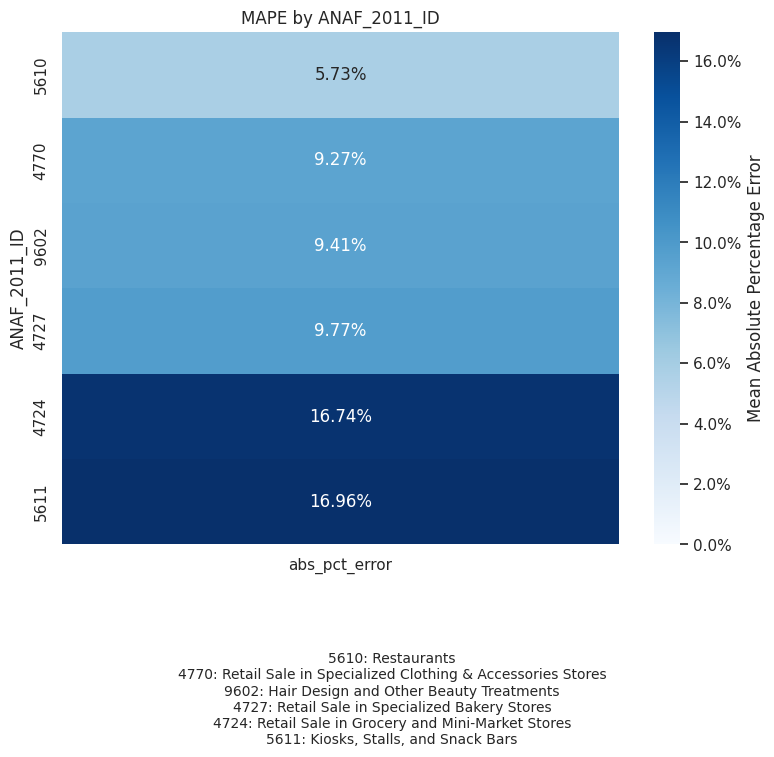

In [ ]:
"""import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# --- Compute MAPE by ANAF_2011_ID ---
mape_by_anaf = (
    results_df
    .groupby("ANAF_2011_ID")["abs_pct_error"]
    .mean()
    .reset_index()
)

# IDs as int
mape_by_anaf["ANAF_2011_ID"] = mape_by_anaf["ANAF_2011_ID"].astype(int)

# Sort best → worst
mape_sorted = mape_by_anaf.sort_values("abs_pct_error")
heatmap_data = mape_sorted.set_index("ANAF_2011_ID")[["abs_pct_error"]]

# --- Plot heatmap ---
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2%",
    cmap="Blues",
    vmin=0,
    cbar_kws={'label': 'Mean Absolute Percentage Error'}
)

# Format colorbar
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.title("MAPE by ANAF_2011_ID")
plt.ylabel("ANAF_2011_ID")
plt.xlabel("")
plt.tight_layout()

# --- Mapping (English translation) ---
anaf_mapping_en = {
    5610: "Restaurants",
    5611: "Kiosks, Stalls, and Snack Bars",
    9602: "Hair Design and Other Beauty Treatments",
    4727: "Retail Sale in Specialized Bakery Stores",
    4724: "Retail Sale in Grocery and Mini-Market Stores",
    4770: "Retail Sale in Specialized Clothing & Accessories Stores"
}

# Build key text in same order as plot
key_text = "\n".join(
    [f"{int(code)}: {anaf_mapping_en.get(int(code), 'Unknown')}" for code in heatmap_data.index]
)

# Place key lower (y = -0.25 pushes it down)
plt.figtext(0.5, -0.25, key_text, wrap=True, ha="center", fontsize=10)

plt.show()

"""

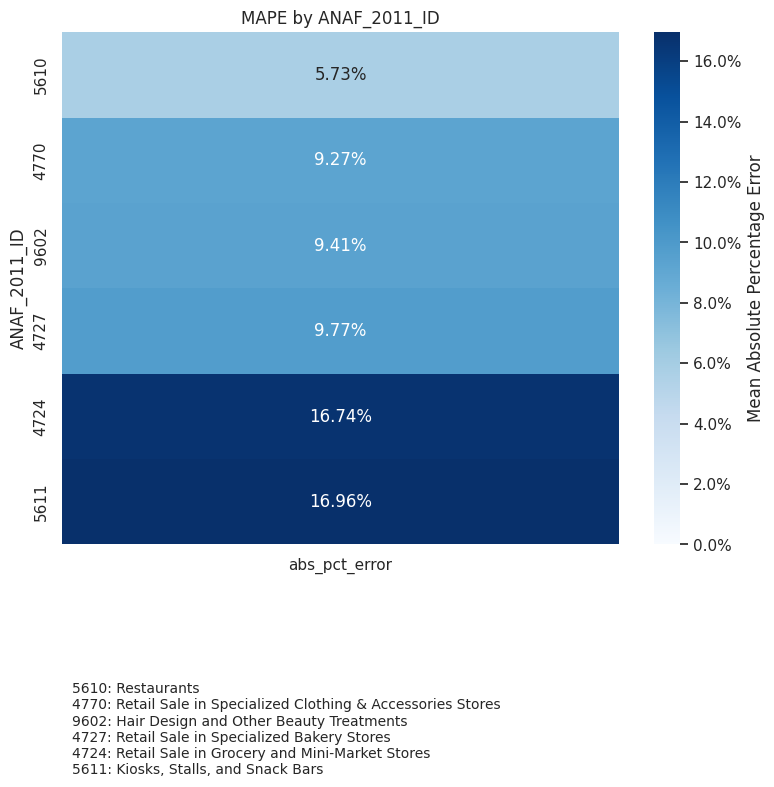

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
"""import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import os
from google.colab import files

# --- Compute MAPE by ANAF_2011_ID ---
mape_by_anaf = (
    results_df
    .groupby("ANAF_2011_ID")["abs_pct_error"]
    .mean()
    .reset_index()
)

# IDs as int
mape_by_anaf["ANAF_2011_ID"] = mape_by_anaf["ANAF_2011_ID"].astype(int)

# Sort best → worst
mape_sorted = mape_by_anaf.sort_values("abs_pct_error")
heatmap_data = mape_sorted.set_index("ANAF_2011_ID")[["abs_pct_error"]]

# --- Plot heatmap ---
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2%",
    cmap="Blues",
    vmin=0,
    cbar_kws={'label': 'Mean Absolute Percentage Error'}
)

# Format colorbar
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.title("MAPE by ANAF_2011_ID")
plt.ylabel("ANAF_2011_ID")
plt.xlabel("")
plt.tight_layout()

# --- Mapping (English translation) ---
anaf_mapping_en = {
    5610: "Restaurants",
    5611: "Kiosks, Stalls, and Snack Bars",
    9602: "Hair Design and Other Beauty Treatments",
    4727: "Retail Sale in Specialized Bakery Stores",
    4724: "Retail Sale in Grocery and Mini-Market Stores",
    4770: "Retail Sale in Specialized Clothing & Accessories Stores"
}

# Build key text in the same order as plot
key_text = "\n".join(
    [f"{int(code)}: {anaf_mapping_en.get(int(code), 'Unknown')}" for code in heatmap_data.index]
)

# Place key lower and slightly left (ha="left")
plt.figtext(0.1, -0.3, key_text, wrap=True, ha="left", fontsize=10)

# --- Save before showing ---
out_path = "/content/mape_by_anaf_heatmap.png"
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()

# --- Download locally ---
files.download(out_path)
"""

In [ ]:
import pandas as pd
from google.colab import files
import pandas as pd

uploaded = files.upload()
filename = list(uploaded.keys())[0]
combos = pd.read_csv(filename)

Saving all_combos_encoded_Quadruple_very_good_pls.csv to all_combos_encoded_Quadruple_very_good_pls (1).csv


In [ ]:
combos.shape

(6290, 133)

In [ ]:
X_full

,anaf_3,ANAF_2011_ID,nafa,mahoz,ovdim_grp,אחוז זרים,גודל משק בית ממוצע,אחוז משקי בית שעומדים לרשותם שני כלי רכב לפחות,אחוז עובדים מחוץ ליישוב המגורים,גיל נישואין חציוני,...,mahoz_3,mahoz_4,mahoz_5,mahoz_6,mahoz_7,ovdim_grp_0,ovdim_grp_1,ovdim_grp_2,ovdim_grp_3,ovdim_grp_4
0,107,1071,1,4.0,0.0,1.9,2.9,39.6,60.5,25.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,107,1071,1,4.0,2.0,1.9,2.9,39.6,60.5,25.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,107,1071,2,4.0,0.0,2.2,3.0,40.4,59.0,25.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,107,1071,2,4.0,3.0,2.2,3.0,40.4,59.0,25.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,107,1071,2,4.0,4.0,2.2,3.0,40.4,59.0,25.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2273,561,5610,4,5.0,2.0,3.6,2.5,23.7,51.3,25.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2274,960,9602,4,5.0,2.0,3.6,2.5,23.7,51.3,25.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2275,960,9602,4,5.0,4.0,3.6,2.5,23.7,51.3,25.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2276,472,4724,4,5.0,0.0,3.6,2.5,23.7,51.3,25.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# 1. Select only nafa + Hebrew columns
hebrew_cols = [c for c in X_full.columns if any('\u0590' <= ch <= '\u05EA' for ch in c)]
X_hebrew = X_full[["nafa"] + hebrew_cols]

# 2. Aggregate to ensure 1 row per nafa
# (using mean as default — you can change to first(), max(), etc.)
X_hebrew_agg = X_hebrew.groupby("nafa", as_index=False).mean(numeric_only=True)

# 3. Merge with combos (now row count stays stable)
combos_aug = combos.merge(X_hebrew_agg, on="nafa", how="left")

print(combos.shape, "->", combos_aug.shape)


(6290, 133) -> (6290, 150)


In [ ]:
sim_cols = [c for c in X_full.columns if c.startswith("sim")]
print(sim_cols)

['sim3_1024d_107', 'sim3_1024d_110', 'sim3_1024d_410', 'sim3_1024d_421', 'sim3_1024d_422', 'sim3_1024d_429', 'sim3_1024d_431', 'sim3_1024d_432', 'sim3_1024d_433', 'sim3_1024d_439', 'sim3_1024d_451', 'sim3_1024d_452', 'sim3_1024d_453', 'sim3_1024d_454', 'sim3_1024d_461', 'sim3_1024d_462', 'sim3_1024d_463', 'sim3_1024d_464', 'sim3_1024d_465', 'sim3_1024d_466', 'sim3_1024d_467', 'sim3_1024d_469', 'sim3_1024d_471', 'sim3_1024d_472', 'sim3_1024d_473', 'sim3_1024d_474', 'sim3_1024d_475', 'sim3_1024d_476', 'sim3_1024d_477', 'sim3_1024d_478', 'sim3_1024d_479', 'sim3_1024d_492', 'sim3_1024d_501', 'sim3_1024d_502', 'sim3_1024d_511', 'sim3_1024d_521', 'sim3_1024d_522', 'sim3_1024d_531', 'sim3_1024d_532', 'sim3_1024d_551', 'sim3_1024d_552', 'sim3_1024d_559', 'sim3_1024d_561', 'sim3_1024d_562', 'sim3_1024d_563', 'sim3_1024d_581', 'sim3_1024d_591', 'sim3_1024d_592', 'sim3_1024d_601', 'sim3_1024d_602', 'sim3_1024d_611', 'sim3_1024d_612', 'sim3_1024d_613', 'sim3_1024d_619', 'sim3_1024d_620', 'sim3_102

In [ ]:
# 1. Get all sim3 columns
sim3_cols = [c for c in X_full.columns if c.startswith("sim3")]

# 2. Keep only key + sim3 columns
X_sim3 = X_full[["anaf_3"] + sim3_cols]

# 3. Collapse duplicates so we only have 1 row per anaf_3
X_sim3_agg = X_sim3.groupby("anaf_3", as_index=False).mean(numeric_only=True)

# 4. Merge into the UPDATED DataFrame (not the original combos)
combos_updated = combos_aug.merge(X_sim3_agg, on="anaf_3", how="left")

print(combos_aug.shape, "->", combos_updated.shape)



(6290, 150) -> (6290, 261)


/tmp/ipython-input-1679119853.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_sim3_agg = X_sim3.groupby("anaf_3", as_index=False).mean(numeric_only=True)


In [ ]:
# 1. Get all sim4 columns
sim4_cols = [c for c in X_full.columns if c.startswith("sim4")]

# 2. Keep only key + sim4 columns
X_sim4 = X_full[["ANAF_2011_ID"] + sim4_cols]

# 3. Collapse duplicates so we only have 1 row per ANAF_2011_ID
X_sim4_agg = X_sim4.groupby("ANAF_2011_ID", as_index=False).mean(numeric_only=True)

# 4. Merge into combos_aug (from previous step)
combos_aug2 = combos_updated.merge(X_sim4_agg, on="ANAF_2011_ID", how="left")

print(combos_updated.shape, "->", combos_aug2.shape)


(6290, 261) -> (6290, 338)


In [ ]:
missing_cols = [c for c in X_full.columns if c not in combos_aug2.columns]

print("Columns in X_full but not in combos_aug2:")
print(missing_cols)
print(f"\nTotal missing columns: {len(missing_cols)}")


Columns in X_full but not in combos_aug2:
['anaf_3_421', 'anaf_3_422', 'anaf_3_429', 'anaf_3_431', 'anaf_3_433', 'anaf_3_439', 'anaf_3_451', 'anaf_3_452', 'anaf_3_453', 'anaf_3_454', 'anaf_3_461', 'anaf_3_462', 'anaf_3_463', 'anaf_3_464', 'anaf_3_465', 'anaf_3_466', 'anaf_3_467', 'anaf_3_469', 'anaf_3_478', 'anaf_3_479', 'anaf_3_492', 'anaf_3_521', 'anaf_3_522', 'anaf_3_531', 'anaf_3_551', 'anaf_3_581', 'anaf_3_591', 'anaf_3_592', 'anaf_3_601', 'anaf_3_602', 'anaf_3_620', 'anaf_3_631', 'anaf_3_642', 'anaf_3_649', 'anaf_3_661', 'anaf_3_662', 'anaf_3_663', 'anaf_3_681', 'anaf_3_691', 'anaf_3_692', 'anaf_3_702', 'anaf_3_712', 'anaf_3_721', 'anaf_3_731', 'anaf_3_732', 'anaf_3_750', 'anaf_3_850', 'anaf_3_858', 'anaf_3_862', 'anaf_3_869', 'anaf_3_872', 'anaf_3_873', 'anaf_3_882', 'anaf_3_900', 'anaf_3_920', 'anaf_3_943', 'anaf_3_951', 'anaf_3_952', 'ANAF_2011_ID_4711']

Total missing columns: 59


In [ ]:
# Your list of missing columns
missing_cols = [
    'anaf_3_421','anaf_3_422','anaf_3_429','anaf_3_431','anaf_3_433','anaf_3_439',
    'anaf_3_451','anaf_3_452','anaf_3_453','anaf_3_454','anaf_3_461','anaf_3_462',
    'anaf_3_463','anaf_3_464','anaf_3_465','anaf_3_466','anaf_3_467','anaf_3_469',
    'anaf_3_478','anaf_3_479','anaf_3_492','anaf_3_521','anaf_3_522','anaf_3_531',
    'anaf_3_551','anaf_3_581','anaf_3_591','anaf_3_592','anaf_3_601','anaf_3_602',
    'anaf_3_620','anaf_3_631','anaf_3_642','anaf_3_649','anaf_3_661','anaf_3_662',
    'anaf_3_663','anaf_3_681','anaf_3_691','anaf_3_692','anaf_3_702','anaf_3_712',
    'anaf_3_721','anaf_3_731','anaf_3_732','anaf_3_750','anaf_3_850','anaf_3_858',
    'anaf_3_862','anaf_3_869','anaf_3_872','anaf_3_873','anaf_3_882','anaf_3_900',
    'anaf_3_920','anaf_3_943','anaf_3_951','anaf_3_952','ANAF_2011_ID_4711'
]

# Add them back as zeros
for col in missing_cols:
    combos_aug2[col] = 0

# Verify shape
print("Final shape:", combos_aug2.shape)



Final shape: (6290, 397)


In [ ]:
# Make a copy to avoid touching the original
combos_final = combos_aug2.copy()

# 1. Predictions from general model
combos_final["pred_from_general"] = predictor_general.predict(combos_aug2)

# 2. Predictions from specific model
combos_final["specific_pred"] = predictor_specific.predict(combos_final)

# 3. Predictions from nafa-specific model
combos_final["specific_nafa_pred"] = predictor_specific_nafa.predict(combos_final)

print("✅ Predictions from all 3 models added")
print(combos_final.shape)
print(combos_final[["pred_from_general","specific_pred","specific_nafa_pred"]].head())



✅ Predictions from all 3 models added
(6290, 400)
   pred_from_general  specific_pred  specific_nafa_pred
0          13.797646      13.694850           13.789680
1          13.799960      13.700810           13.820693
2          13.739868      13.647436           13.724710
3          13.813475      13.765169           13.782070
4          13.775403      13.689892           13.815752


In [ ]:
# Load the final trained model (if not already loaded)
final_predictor = TabularPredictor.load("autogluon_final/")

# Predict on combos_final
combos_final["final_pred"] = final_predictor.predict(combos_final)

print("✅ Added final_pred from autogluon_final")
print(combos_final.shape)
print(combos_final[["pred_from_general","specific_pred","specific_nafa_pred","final_pred"]].head())


✅ Added final_pred from autogluon_final
(6290, 401)
   pred_from_general  specific_pred  specific_nafa_pred  final_pred
0          13.797646      13.694850           13.789680   13.707012
1          13.799960      13.700810           13.820693   13.864737
2          13.739868      13.647436           13.724710   13.763616
3          13.813475      13.765169           13.782070   13.846159
4          13.775403      13.689892           13.815752   13.731686


In [ ]:
# 1. Make sure final_pred is exponentiated
combos_final["final_pred_exp"] = np.exp(combos_final["final_pred"])

# 2. Select the columns of interest
subset = combos_final[["ovdim_grp", "nafa", "ANAF_2011_ID", "final_pred_exp"]]

# 3. Create a dictionary of tables by ovdim_grp
tables = {}
for grp, df_grp in subset.groupby("ovdim_grp"):
    tables[grp] = df_grp.copy()
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

# Now when you print, numbers show normally
for grp, df_grp in tables.items():
    print(f"\nTable for ovdim_grp = {grp}")
    print(df_grp.head())




Table for ovdim_grp = 0
   ovdim_grp  nafa  ANAF_2011_ID  final_pred_exp
0          0     1          1071      897,180.38
1          0     2          1071    1,050,457.62
2          0     3          1071      949,428.62
3          0     4          1071    1,031,122.94
4          0     5          1071      919,592.25

Table for ovdim_grp = 1
      ovdim_grp  nafa  ANAF_2011_ID  final_pred_exp
1258          1     1          1071    1,214,270.50
1259          1     2          1071    1,185,376.38
1260          1     3          1071    1,299,834.25
1261          1     4          1071    1,172,915.75
1262          1     5          1071    1,007,602.06

Table for ovdim_grp = 2
      ovdim_grp  nafa  ANAF_2011_ID  final_pred_exp
2516          2     1          1071    1,780,732.38
2517          2     2          1071    1,835,362.25
2518          2     3          1071    1,732,156.50
2519          2     4          1071    1,814,145.62
2520          2     5          1071    1,524,736.75

Table 

In [ ]:
!pip install flask-ngrok

In [ ]:
!pip install pyngrok

from pyngrok import ngrok

# Open a tunnel on port 5000
public_url = ngrok.connect(5000)
print(" * ngrok tunnel:", public_url)

# Run Flask on port 5000
app.run(port=5000)


ERROR:pyngrok.process.ngrok:t=2025-09-28T10:25:36+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-09-28T10:25:36+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"


PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

In [ ]:
import pandas as pd

# Make sure we have the exponentiated predictions
combos_final["final_pred_exp"] = np.exp(combos_final["final_pred"])

# Keep only the relevant columns
subset = combos_final[["ovdim_grp", "nafa", "ANAF_2011_ID", "final_pred_exp"]]

# Split into tables
tables = {grp: df.copy() for grp, df in subset.groupby("ovdim_grp")}

# Save each to CSV
for grp, df_grp in tables.items():
    filename = f"predictions_ovdim_grp_{grp}.csv"
    df_grp.to_csv(filename, index=False)
    print(f"✅ Saved {filename} with {df_grp.shape[0]} rows and {df_grp.shape[1]} cols")


✅ Saved predictions_ovdim_grp_0.csv with 1258 rows and 4 cols
✅ Saved predictions_ovdim_grp_1.csv with 1258 rows and 4 cols
✅ Saved predictions_ovdim_grp_2.csv with 1258 rows and 4 cols
✅ Saved predictions_ovdim_grp_3.csv with 1258 rows and 4 cols
✅ Saved predictions_ovdim_grp_4.csv with 1258 rows and 4 cols
